**Pyladies Berlin Meetup 05.12.17**

In this notebook we will apply the unsupervised machine learning methods discussed in the talk on both toy and real world examples.

We will firstly import the required modules. 

In [32]:
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.train_Test_split import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans




ImportError: No module named 'sklearn.train_Test_split'

** One-Class SVM **

We will explore utilising a OC-SVM on a toy data set, and the continue to use it for a real-world scenario.

We will generate a 2-D Swiss Roll for testing a OC-SVM. 
The algorithm is from *S. Marsland, “Machine Learning: An Algorithmic Perspective”, Chapter 10, 2009*. We could have alternatively just taken 2 dimensions from sklearn.data.make_swiss_roll. 

In [2]:
nSamples = 7000
nFeatures = 2
nLayers = 5
radius = 5
nLayers = 5
radius = 5
rand = np.random.RandomState(1711)

t = rand.uniform(low=0, high=1, size=nSamples)
toyData1 = np.zeros((nSamples, nFeatures))

maxRot = nLayers * 2 * np.pi
toyData1[:, 0] = radius * t * np.cos(t * maxRot) + 0.1*np.random.normal(0, 1, nSamples)
toyData1[:, 1] = radius *  t * np.sin(t * maxRot)+ 0.1*np.random.normal(0, 1, nSamples)


We will now use matplotlib to scatter this data.

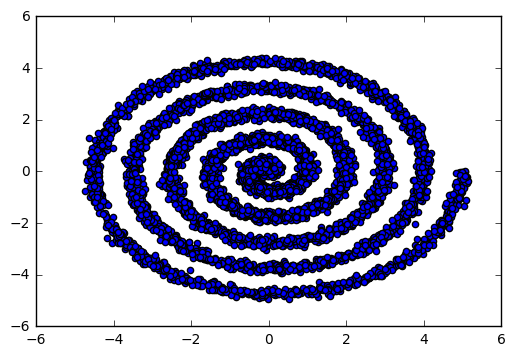

In [3]:
# TODO: Plot the toy data scatter plot
plt.scatter(toyData1[:,0], toyData1[:,1])
plt.show()

In the next section we will create a one-class SVM and train it on the toy data. 

In [4]:
# TODO: Use sklearn's One Class SVM class with a nu=0.15 and gamma=7 and train it on the toy data set. 
# Set the random_state to 1711
clf = OneClassSVM(kernel="rbf", nu=0.15, gamma=7, random_state=1711)
#clf = OneClassSVM(kernel="poly", nu=0.15, gamma=7, random_state=1711)
clf.fit(toyData1)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=7, kernel='rbf',
      max_iter=-1, nu=0.15, random_state=1711, shrinking=True, tol=0.001,
      verbose=False)

In the next section we will plot the data set, the decision surface and the contour plot. 

In [5]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

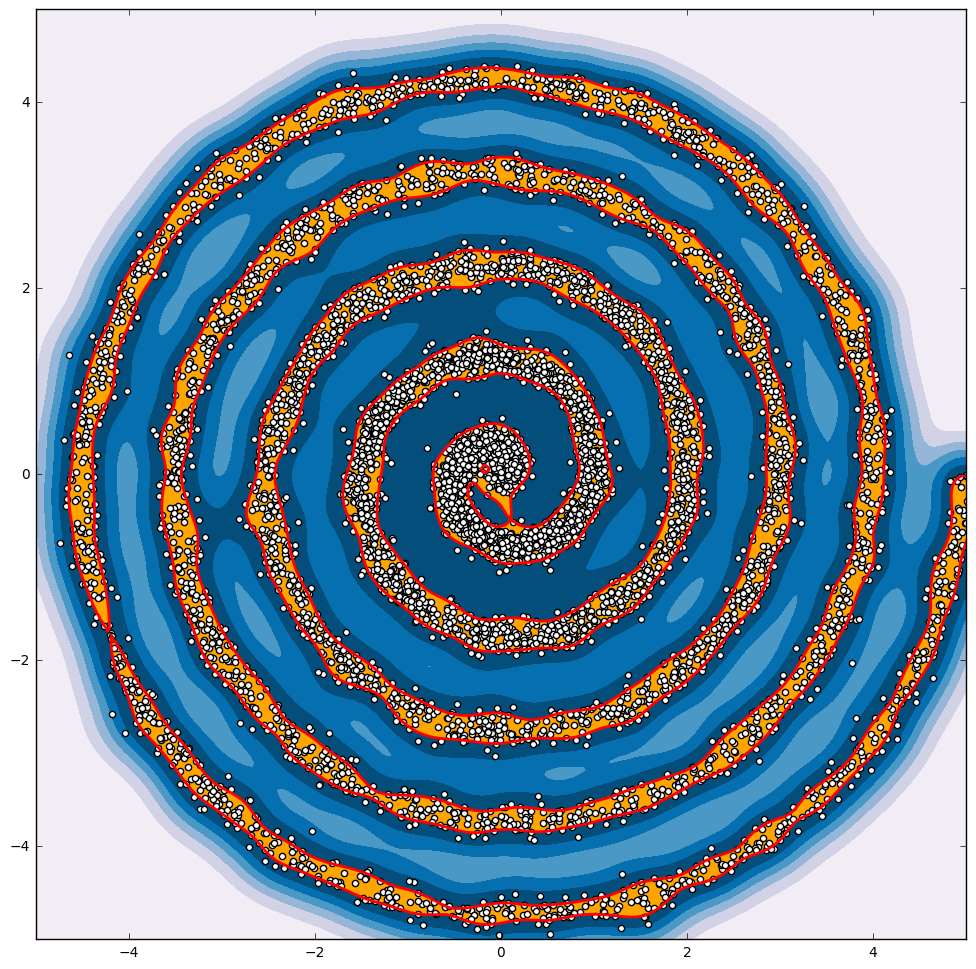

In [6]:
plt.figure(figsize=(12, 12), dpi= 80)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
plt.scatter(toyData1[:,0], toyData1[:,1], c='white')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.show()

** Using a One-Class SVM to detect credit card fraud detection ** 

We will now use a real life example of detecting credit card fraud based on the data set provided by 

In [9]:
#TODO: Use Pandas to load the credit card transaction data from creditCardTransactions.csv into dfCreditCardData
dfCreditCardData = pd.read_csv('creditCardTransactions.csv')

The datasets contains transactions made by credit cards in September 2013 by european cardholders. For anonomity reasons the authors transformed the majority of the data using PCA and provided the first 28 Principal Components. The only numerical values they left was the amount of the transaction. The other value is the time. Let us still observe the value ranges uses describe().

The dataset is provided by a research collaboration of the Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles). It is under the ODbL 1.0 license.

In [11]:
dfCreditCardData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Let us observe how many transactions are normal and how many are fraudulent. 

In [12]:
dfCreditCardData['Class'].value_counts()
# for unbalanced classes it is better to use unsupervised learning. but if you have >2 classes then you have to use supervised

0    284315
1       492
Name: Class, dtype: int64

What are your observations?

Since we are observing the transactions independently we can drop the time feature. 

In [13]:
#TODO: Drop the Time column
dfCreditCardData.drop('Time', axis=1, inplace=True)

Our next step is to divide our data points from their labels. We will then apply a MinMaxScaler and then proceed to apply PCA on them. 

In [16]:
# For conssistency of the notation we will apply the label -1 to the anomolous cases and 1 to the normal ones.  
dfCreditCardData['Class'] = dfCreditCardData['Class'].replace({0: 1, 1:-1})

X = dfCreditCardData.ix[:, 0:29]  # features
y = dfCreditCardData.ix[:, 29]  # labels

#TODO: Apply a Min Max Scaler on X
scl = MinMaxScaler()
X = scl.fit_transform(X)

#TODO: Apply a regular PCA on X
pca = PCA()
X = pca.fit_transform(X)

# if you forget to normalize the data before PCA then you end up with a very large first component and very small remaining components.
# if you normalize it (is likely to) look much more balanced

Separate our data and label set into a training using train_test_split. Usually, the test set should be smaller than the training set. Due to the convergence rate of the algorithm, and our time constraints of the meetup, set the test_size to 0.75. Random state=1711

In [17]:
# TODO, Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.75, random_state = 1711)
X_train.shape
# random_state = seed

(71201, 29)

Remove the fraudulent transactions from our data set.

In [18]:
# TODO: Remove the fradulent training samples
X_train = X_train[Y_train==1]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  from ipykernel import kernelapp as app


Create a OneClassSVM with an rbf kernel using sklearn and fit it on the training data.

In [19]:
# Create a OneClassSVM with an rbf kernel using sklearn and fit it on the training data.  Set nu to 0.2. Random state=1711
ocSVM = OneClassSVM(kernel='rbf', random_state=1711)

In [20]:
# Fit the OCSVM on the good data
ocSVM.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=1711, shrinking=True, tol=0.001,
      verbose=False)

After the fitting is done proceed to classify the remaining test samples and 

In [21]:
y_test_pred = ocSVM.predict(X_test)

In [22]:
y_test_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [23]:
print(classification_report(Y_test, y_test_pred))

             precision    recall  f1-score   support

         -1       0.00      1.00      0.00       361
          1       0.00      0.00      0.00    213245

avg / total       0.00      0.00      0.00    213606



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** Breast Cancer **

In the next example we will use unsupervised machine learning algorithms in order to detect breast cancer. 
The data set used is the Breast Cancer Wisconsin (Diagnostic) Data Set, provided by the UCI Machine Learning Repository. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. We inspect their characteristics. 

In [24]:
dataBreastCancer = sklearn.datasets.load_breast_cancer()
dfBreastCancer = pd.DataFrame(dataBreastCancer.data, columns=[dataBreastCancer.feature_names])

In [25]:
dfBreastCancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
# TODO: Load the features into an nXBreastCancer and the labels in yBreastCancer
XBreastCancer = np.array(dfBreastCancer.values)
yBreastCancer = np.array(dataBreastCancer.target)

In [27]:
# TODO: Normalize the data using a min max scaler and then apply t-sne to it. 
tsne = TSNE(verbose=1, perplexity=20, n_iter=4000)
nrm2 = MinMaxScaler()
XBreastCancer = nrm2.fit_transform(XBreastCancer)
Y = tsne.fit_transform(XBreastCancer)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.179657
[t-SNE] Error after 100 iterations with early exaggeration: 1.042965
[t-SNE] Error after 175 iterations: 0.985749


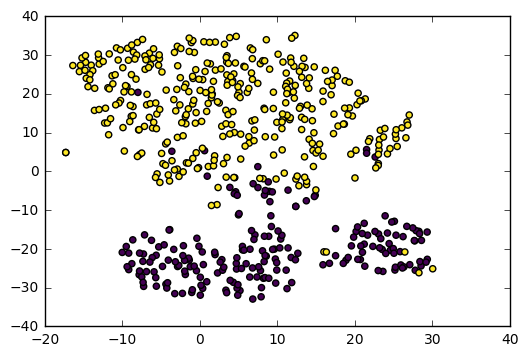

In [28]:
# TODO: Scatter the transformed data and color them according to their labes
plt.scatter(Y[:,0], Y[:,1], c=yBreastCancer, cmap='viridis')
plt.show()

In [29]:
# TODO: Use K-Means with 2 clusters to predict the classes of the data 
km = KMeans(n_clusters=2)
kY = km.fit_predict(XBreastCancer)

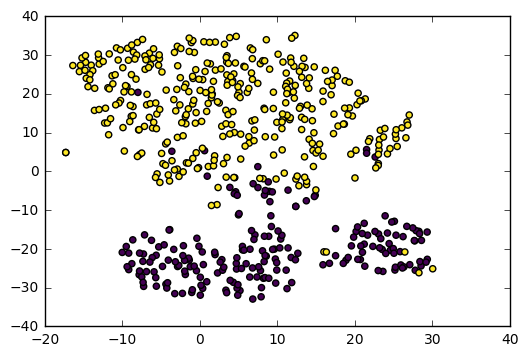

In [30]:
# TODO: Scatter the transformed data with the prediction based on k-means
plt.scatter(Y[:,0], Y[:,1], c=yBreastCancer, cmap='viridis')
plt.show()